# Breast cancer

## 1. Classification task - Predicting whether a woman with breast cancer will survive.


1 in 8 women in the US will develop breast cancer in her lifetime, breast cancer became the most common cancer globally according to the World Health Organization therefore it is an urgent topic to be disscussed and investigated. The aim of this model is to indentify a correlation between any of the parameters that a woman can control such as getting checked and therefore descreasing the stage of cancer when identified in order to increase survival rates. By finding a clear correlation it will increase awareness of getting checked and will hopefully accordingly increase survival rates (as death rates are 1 in 39 women according to the Breast Cancer Statistics).

We took our data from:

https://ieee-dataport.org/open-access/seer-breast-cancer-data

## 2. Understanding our data


The dataset is used to predict whether a woman will survive breast cancer based on different parameters such as age, race, tumor size, etc..

The data contains 15 attributes and 4023 observations.
   
   Age: age of the patient at diagnosis.
   
   Race: "Black", "Other (American Indian/AK Native, Asian/Pacific Islander)", "White".
   
   Material Status: the patient’s marital status at the time of diagnosis, "Divorced" , "Married" , "Separated", "Single", "Widowed".
   
   T stage: the size and location of the tumor, where T1 is the smallest and T4 the largest, larger tumors or tumors that have grown deeper into nearby tissue will get a higher number.
   
   N stage: the number and location of lymph nodes that contain cancer between N1 and N3, as the number increases the number of infected lymph nodes increases. 
   
   6th stage:  
       "iiA", "iiB" - Stage 2, more information can be found on https://www.breastcancer.org/treatment/planning/cancer_stage/stage_iia_iib#:~:text=In%20general%2C%20stage%20IIA%20describes,a%20sentinel%20node%20biopsy)%20or
        "iiiA", "iiB" , "iiC" - Stage 3, more information can be found on https://www.breastcancer.org/treatment/planning/cancer_stage/stage_iiia_op_iiic
        
 Grade :  how abnormal the cancer cells and tissue look under a microscope when compared to healthy cells, between 1-4, where 1 is very differentiated and 4 is undifferentiated. 
 
 A stage: "Regional" -  extended beyound the organ or into the surrounding organs/ tissues.
          "Distant" - speaded into unrelated organs or tissues in the body.
          
 Tumour size: measured in millimeters at the time of diagnosis.
 
 Estrogen status - if the patient has receptors for estrogen, either "Positive" or "Negative".
 
 Progesterone status  -  if the patient has receptors for progesterone, either "Positive" or "Negative".
 
 Regional node examined - the number of lymph nodes that were removed in order to be examined.
 
 Regional node positive - the number of lymph nodes that were examined and found to have metastases.
 
 Survival Months - from the day of diagnosis untill the day of last contact.
 
 Status - "dead", "alive".
 

### Imports

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression as LogReg

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeRegressor


In [110]:
df = pd.read_csv(r'C:\Users\Maya\Desktop\BreastCancer.csv', sep =',')

In [4]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [5]:
print(df.columns.tolist())

['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

As we can see there are a few collumns that are a catagorial attributes we will soon change them into ints so we can work with them. 

Next we will have to find out whether there is any missing data we need to handle.

In [7]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In order to find the best model for our data we'll first have to understand our dataset.

## Understanding the dataset

In [8]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


Notice that the mean and the 50th percentile are almost the same, this is happening as we are talking about natural things therefore we won't have any "too far away" high/ low ends. The std is fairely small so we know our data is close together and our range is not as big which tells us it affects similar women, from the same group age usually. 

# 3. Aim

Our aim is to classify the attributes into "Dead" or "Alive" and by that help people know in advance what they're going towards. Hopfully we can find a corralation between the stage of cancer when diagnosed and the survival status and by that make women go and get tested more frequently.

In [9]:
df[df['Status']=='Alive'].describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000
mean,53.759096,29.268779,14.237383,3.600646,75.941021
std,8.808420,20.303175,8.023208,4.375180,19.386459
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,15.000000,9.000000,1.000000,61.000000
50%,54.000000,23.000000,14.000000,2.000000,77.000000
75%,61.000000,35.000000,19.000000,4.000000,92.000000
max,69.000000,140.000000,61.000000,41.000000,107.000000


In [10]:
df[df['Status']=='Dead'].describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,616.000000,616.000000,616.000000,616.000000,616.000000
mean,55.150974,37.139610,15.019481,7.241883,45.610390
std,9.698291,24.116115,8.486600,7.312642,23.966253
min,30.000000,1.000000,1.000000,1.000000,2.000000
25%,48.000000,20.000000,9.000000,2.000000,27.000000
50%,56.500000,30.000000,14.000000,4.000000,44.000000
75%,63.000000,50.000000,20.000000,10.000000,61.000000
max,69.000000,140.000000,57.000000,46.000000,102.000000


A few things we can learn from the two tables above are:

    The tumour size of the women who died was larger on average by 127% than the size of those who survived.
    The average percetage of regional node positive in patient that survive is 25.3% and those that didn't is 50%.
    
    Those two things show that there must be a clear corralation between when the stage at diagnosis and survival and that 
    is what we will have to investigate.
    
    Another important attribute to pay attention to is the survival months, we see that on average if a women survives over 75.9 months (with standart deviation of 19 months) will stay alive therefore, we can look at it as kind of a mile stone a woman needs to pass in order to increase her chances of survival.
    
   

Another thing we notice after the second semester is that the STD isn't much lower when looking at the difference between dead and alive when it comes to the attributes tested above, although "Regional node positive" has the highest correlation with the survival rate. 
We do see that the average "Regional node positive" is way lower in the status alive but what is surprising is how different the mean is from the 50th  percentile in the status = dead. We will have to visulize our data in order to explain this.

## Visulazing our data

In the following diagrams the Y axis represet the number of women and the X axis the attributes.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tumor Size'}>],
       [<AxesSubplot:title={'center':'Regional Node Examined'}>,
        <AxesSubplot:title={'center':'Reginol Node Positive'}>],
       [<AxesSubplot:title={'center':'Survival Months'}>, <AxesSubplot:>]],
      dtype=object)

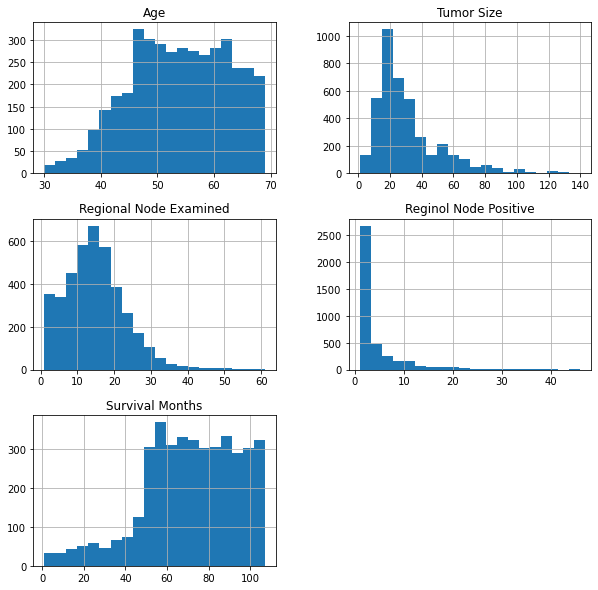

In [11]:
atttibutes_hist = df[["Age", "Tumor Size" , "Regional Node Examined", "Reginol Node Positive", "Survival Months"]].hist(bins=20, figsize=(10,10))
atttibutes_hist

array([[<AxesSubplot:title={'center':'Reginol Node Positive'}>]],
      dtype=object)

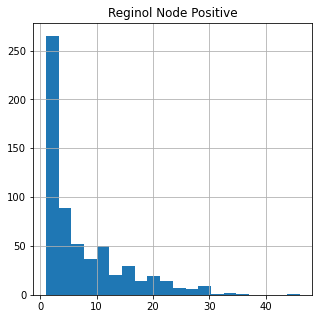

In [12]:
df_dead = df[df['Status']=='Dead']
atttibutes_hist = df_dead[[ "Reginol Node Positive"]].hist(bins=20, figsize=(5,5))
atttibutes_hist


array([[<AxesSubplot:title={'center':'Reginol Node Positive'}>]],
      dtype=object)

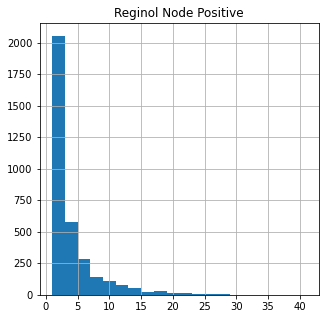

In [13]:
df_alive = df[df['Status']=='Alive']
atttibutes_hist = df_alive[[ "Reginol Node Positive"]].hist(bins=20, figsize=(5,5))
atttibutes_hist


Those histograms help us understand the division of the data way better, notice that the graphs do look similar however when we check the y axis we see a great difference and another thing is how more spread out the status = dead graph is than the alive. This immidietly shows us how much this attributes affects the final result.

First thing we would like to take a look at the status so we know what we are going to compare the catagorial attributes to.
Looking at the pie chart we see that in this paticular dataset, the survival rate stands on 84.69%, of course we would like to have this number increased and will hopefully be doing it by find a corralation with an attribute women can control.

<AxesSubplot:title={'center':'Status Pie Chart'}, ylabel='None'>

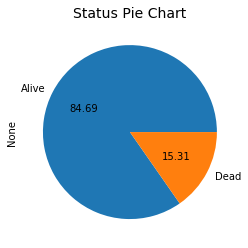

In [14]:
fig = df.groupby('Status').size().plot(kind='pie', autopct='%.2f')
fig.set_title("Status Pie Chart", fontdict={'fontsize': 14})
fig

<AxesSubplot:title={'center':'Marital Status Pie Chart'}, ylabel='None'>

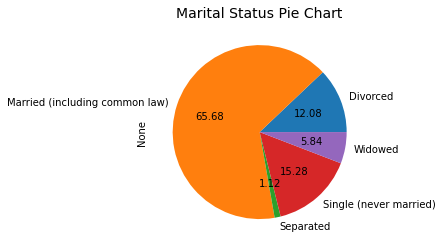

In [15]:
fig1 = df.groupby('Marital Status').size().plot(kind='pie', autopct='%.2f')
fig1.set_title("Marital Status Pie Chart", fontdict={'fontsize': 14})
fig1

<AxesSubplot:title={'center':'Race Pie Chart'}, ylabel='None'>

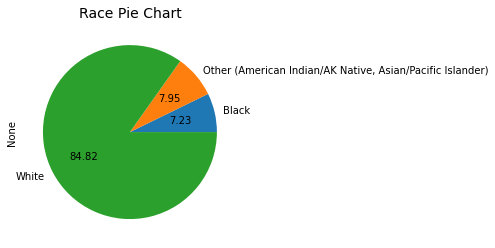

In [16]:
fig2 = df.groupby('Race').size().plot(kind='pie', autopct='%.2f')
fig2.set_title("Race Pie Chart", fontdict={'fontsize': 14})
fig2

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

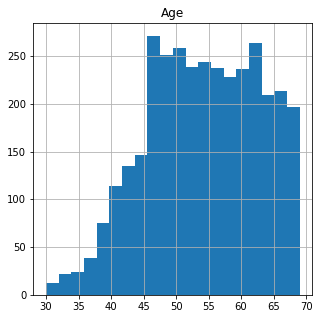

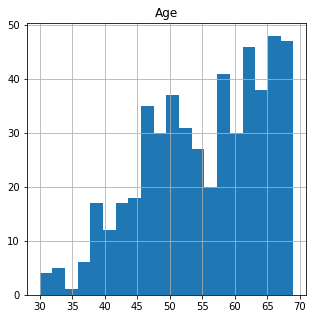

In [49]:
df_white = df[df['Race']=='White']
df_final = df_white[df_white['Status']=='Dead']

atttibutes_hist = df_white[["Age"]].hist(bins=20, figsize=(5,5))
atttibutes_hist1 = df_final[[ "Age"]].hist(bins=20, figsize=(5,5))

atttibutes_hist
atttibutes_hist1

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

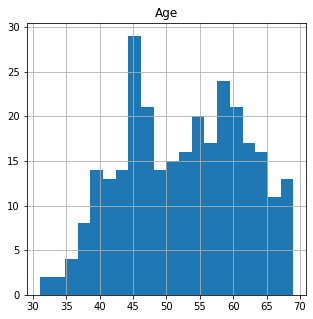

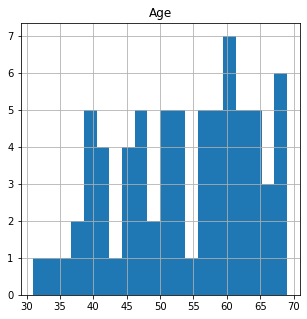

In [52]:
df_black = df[df['Race']=='Black']
df_final = df_black[df_black['Status']=='Dead']
atttibutes_hist = df_black[[ "Age"]].hist(bins=20, figsize=(5,5))
atttibutes_hist1 = df_final[[ "Age"]].hist(bins=20, figsize=(5,5))

atttibutes_hist
atttibutes_hist1

Note the difference in spead 

<AxesSubplot:title={'center':'T Stage Pie Chart'}, ylabel='None'>

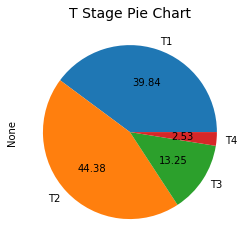

In [53]:
fig3 = df.groupby('T Stage').size().plot(kind='pie', autopct='%.2f')
fig3.set_title("T Stage Pie Chart", fontdict={'fontsize': 14})
fig3

<AxesSubplot:title={'center':'N Stage Pie Chart'}, ylabel='None'>

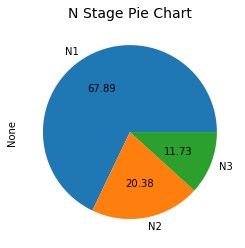

In [54]:
fig4 = df.groupby('N Stage').size().plot(kind='pie', autopct='%.2f')
fig4.set_title("N Stage Pie Chart", fontdict={'fontsize': 14})
fig4

<AxesSubplot:title={'center':'6th Stage Pie Chart'}, ylabel='None'>

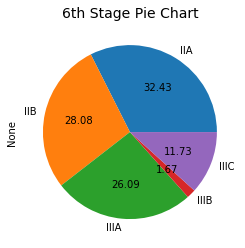

In [55]:
fig5 = df.groupby('6th Stage').size().plot(kind='pie', autopct='%.2f')
fig5.set_title("6th Stage Pie Chart", fontdict={'fontsize': 14})
fig5

<AxesSubplot:title={'center':'Grade Pie Chart'}, ylabel='None'>

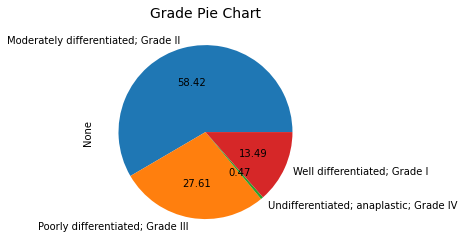

In [56]:
fig6 = df.groupby('Grade').size().plot(kind='pie', autopct='%.2f')
fig6.set_title("Grade Pie Chart", fontdict={'fontsize': 14})
fig6

<AxesSubplot:title={'center':'A Stage Pie Chart'}, ylabel='None'>

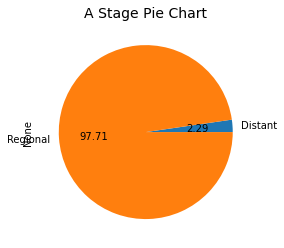

In [57]:
fig7 = df.groupby('A Stage').size().plot(kind='pie', autopct='%.2f')
fig7.set_title("A Stage Pie Chart", fontdict={'fontsize': 14})
fig7

<AxesSubplot:title={'center':'Estrogen Status Pie Chart'}, ylabel='None'>

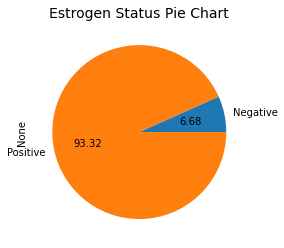

In [58]:
fig8 = df.groupby('Estrogen Status').size().plot(kind='pie', autopct='%.2f')
fig8.set_title("Estrogen Status Pie Chart", fontdict={'fontsize': 14})
fig8

<AxesSubplot:title={'center':'Progesterone Status Pie Chart'}, ylabel='None'>

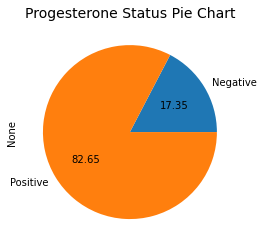

In [59]:
fig9 = df.groupby('Progesterone Status').size().plot(kind='pie', autopct='%.2f')
fig9.set_title("Progesterone Status Pie Chart", fontdict={'fontsize': 14})
fig9

Next thing we will be doing is converting the catagorial parameters into numericals so they are comparable and easier to work with and analyse.

In [60]:
df_copy = df.copy()
df_result = pd.get_dummies(df_copy, columns=[ 'Race', 'Marital Status','T Stage', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status' , 'Status'], prefix=[ 'Race', 'Marital Status','T stage', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status' , 'Status'])
df_result.rename(columns={"Race_0": "White_Race", "Race_1": "Black_Race", "Race_2": "Other (American Indian/AK Native, Asian/Pacific Islander)_Race", 
                            "Marital Status_0": "Married (including common law)_Marital Status", "Marital Status_1": "Divorced_Marital Status", "Marital Status_2": "Separated_Marital Status", "Marital Status_3": "Single (never married)_Marital Status" , "Marital Status_4": "Widowed_Marital Status",
                            "T Stage_0": "T1_T Stage",  "T Stage_1": "T2_T Stage",  "T Stage_2": "T3_T Stage",  "T Stage_3": "T4_T Stage",
                            "N Stage_0": "N1_N Stage",  "N Stage_1": "N2_N Stage",  "N Stage_2": "N3_N Stage",
                            "6th Stage_0": "IIA_6th Stage", "6th Stage_1": "IIB_6th Stage", "6th Stage_2": "IIIA_6th Stage", "6th Stage_3": "IIIB_6th Stage", "6th Stage_4": "IIIC_6th Stage",
                            "Grade_1": "Well differentiated; Grade I_Grade", "Grade_2": "Moderately differentiated; Grade II_Grade", "Grade_3": "Poorly differentiated; Grade III_Grade", "Grade_4":"Undifferentiated; anaplastic; Grade IV_Grade",
                            "A Stage_0": "Regional_A Stage", "A Stage_1": "Distant_A Stage",
                            "Estrogen Status_1":"Positive_Estrogen Status", "Estrogen Status_0":"Negative_Estrogen Status",
                            "Progesterone Status_0":"Positive_Progesterone Status" , "Progesterone Status_1":"Negative_Progesterone Status",
                            "Status_0":"Alive_Status", "Status_1":"Dead_Status"}, inplace=True)

df_result

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Divorced,Marital Status_Married (including common law),...,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive,Status_Alive,Status_Dead
0,43,40,19,11,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,1,0
1,47,45,25,9,2,0,1,0,0,1,...,0,0,0,1,0,1,0,1,1,0
2,67,25,4,1,2,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,1
3,46,19,26,1,2,0,0,1,1,0,...,0,0,0,1,0,1,0,1,0,1
4,63,35,21,5,3,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,10,19,1,107,0,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
4020,53,9,13,5,107,0,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
4021,53,9,4,2,107,0,0,1,1,0,...,0,0,0,1,1,0,1,0,1,0
4022,60,9,14,2,107,0,1,0,0,1,...,0,0,0,1,0,1,0,1,1,0


In [61]:
print(df_result.columns.tolist())

['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Race_Black', 'Race_Other (American Indian/AK Native, Asian/Pacific Islander)', 'Race_White', 'Marital Status_Divorced', 'Marital Status_Married (including common law)', 'Marital Status_Separated', 'Marital Status_Single (never married)', 'Marital Status_Widowed', 'T stage_T1', 'T stage_T2', 'T stage_T3', 'T stage_T4', 'N Stage_N1', 'N Stage_N2', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC', 'Grade_Moderately differentiated; Grade II', 'Grade_Poorly differentiated; Grade III', 'Grade_Undifferentiated; anaplastic; Grade IV', 'Grade_Well differentiated; Grade I', 'A Stage_Distant', 'A Stage_Regional', 'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive', 'Status_Alive', 'Status_Dead']


After prepering our data and having understood it, our next aim is to find an appropriate model and corralation.

In [62]:
df_result.corr()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Divorced,Marital Status_Married (including common law),...,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive,Status_Alive,Status_Dead
Age,1.000000,-0.077215,-0.033345,0.012586,-0.009390,-0.043348,-0.083334,0.094113,0.047953,-0.051305,...,-0.012730,0.058039,-0.020860,0.020860,-0.059787,0.059787,0.021269,-0.021269,-0.055921,0.055921
Tumor Size,-0.077215,1.000000,0.104352,0.242322,-0.086901,0.000644,0.007283,-0.005955,0.020541,-0.028056,...,0.044634,-0.076851,0.123883,-0.123883,0.059585,-0.059585,0.069879,-0.069879,-0.134205,0.134205
Regional Node Examined,-0.033345,0.104352,1.000000,0.411580,-0.022054,-0.001530,0.012898,-0.008620,0.015391,-0.009878,...,0.000991,-0.081990,0.069010,-0.069010,0.044836,-0.044836,0.018051,-0.018051,-0.034772,0.034772
Reginol Node Positive,0.012586,0.242322,0.411580,1.000000,-0.135214,0.014463,0.002773,-0.012529,0.036004,-0.042492,...,0.026963,-0.084261,0.232849,-0.232849,0.085985,-0.085985,0.078069,-0.078069,-0.256638,0.256638
Survival Months,-0.009390,-0.086901,-0.022054,-0.135214,1.000000,-0.057090,0.024674,0.022603,-0.012572,0.041143,...,-0.020667,0.028252,-0.070109,0.070109,-0.128469,0.128469,-0.096018,0.096018,0.476514,-0.476514
Race_Black,-0.043348,0.000644,-0.001530,0.014463,-0.057090,1.000000,-0.082065,-0.659880,0.014293,-0.157893,...,0.022757,-0.020409,0.008646,-0.008646,0.052041,-0.052041,0.034267,-0.034267,-0.075818,0.075818
"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",-0.083334,0.007283,0.012898,0.002773,0.024674,-0.082065,1.000000,-0.694684,-0.027195,0.051889,...,-0.020245,0.007579,-0.001943,0.001943,0.020625,-0.020625,0.006048,-0.006048,0.040780,-0.040780
Race_White,0.094113,-0.005955,-0.008620,-0.012529,0.022603,-0.659880,-0.694684,1.000000,0.010187,0.074839,...,-0.001162,0.009016,-0.004776,0.004776,-0.053110,0.053110,-0.029292,0.029292,0.023977,-0.023977
Marital Status_Divorced,0.047953,0.020541,0.015391,0.036004,-0.012572,0.014293,-0.027195,0.010187,1.000000,-0.512733,...,-0.014403,-0.030314,0.019841,-0.019841,-0.016759,0.016759,0.011478,-0.011478,-0.033045,0.033045
Marital Status_Married (including common law),-0.051305,-0.028056,-0.009878,-0.042492,0.041143,-0.157893,0.051889,0.074839,-0.512733,1.000000,...,-0.011296,0.012796,-0.022505,0.022505,-0.007716,0.007716,-0.026891,0.026891,0.067734,-0.067734


We are interested in two correlations: 
    we want to learn how to "avoid" Status = Dead and simultaneously find out how to make sure Status = Alive.

In [63]:
corr_matrix = df_result.corr()
corr_matrix["Status_Dead"].sort_values(ascending = False)

Status_Dead                                                       1.000000
Reginol Node Positive                                             0.256638
6th Stage_IIIC                                                    0.233250
N Stage_N3                                                        0.233250
Estrogen Status_Negative                                          0.184650
Progesterone Status_Negative                                      0.177079
Grade_Poorly differentiated; Grade III                            0.143460
Tumor Size                                                        0.134205
T stage_T4                                                        0.107078
A Stage_Distant                                                   0.096584
Race_Black                                                        0.075818
T stage_T3                                                        0.070054
N Stage_N2                                                        0.067634
Grade_Undifferentiated; a

We notice that the top 10 correlation that are: Reginol Node Positive, 6th Stage_IIIC, N Stage_N3, Estrogen Status_Negative, Progesterone Status_Negative, Grade_Poorly differentiated,Tumor Size, T stage_T4, A Stage_Distant, Race_Black.

**We will plot them to help us visulise them:**

In [64]:
df_copy = df.copy()
df_status = pd.get_dummies(df_copy, columns=['Status'], prefix=['Status'])
df_status.rename(columns={  "Status_0":"Alive_Status", "Status_1":"Dead_Status"}, inplace=True)

df_status

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status_Alive,Status_Dead
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,1,0
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,1,0
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,0,1
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,0,1
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,1,0
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,1,0
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,1,0
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,1,0


In [65]:
df_percentage = df_status
df_percentage

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status_Alive,Status_Dead
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,1,0
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,1,0
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,0,1
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,0,1
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,1,0
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,1,0
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,1,0
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,1,0


As there are two collumns ("Regional node positive" and "Regional node examined") that are related we thought creating another collumn to see the ratio between them would help us perhaps find a better correlation: 

In [66]:
sum_column = df["Reginol Node Positive"] / df["Regional Node Examined"] *100
df_percentage["Node_Percetage"] = sum_column
print(df_percentage)

      Age                                               Race  \
0      43  Other (American Indian/AK Native, Asian/Pacifi...   
1      47  Other (American Indian/AK Native, Asian/Pacifi...   
2      67                                              White   
3      46                                              White   
4      63                                              White   
...   ...                                                ...   
4019   52                                              White   
4020   53                                              White   
4021   53                                              White   
4022   60  Other (American Indian/AK Native, Asian/Pacifi...   
4023   62                                              White   

                      Marital Status T Stage N Stage 6th Stage  \
0     Married (including common law)      T2      N3      IIIC   
1     Married (including common law)      T2      N2      IIIA   
2     Married (including common l

In [67]:
df_percentage

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status_Alive,Status_Dead,Node_Percetage
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,1,0,57.894737
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,1,0,36.000000
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,0,1,25.000000
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,0,1,3.846154
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,0,1,23.809524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,1,0,5.263158
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,1,0,38.461538
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,1,0,50.000000
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,1,0,14.285714


<Figure size 1008x504 with 0 Axes>

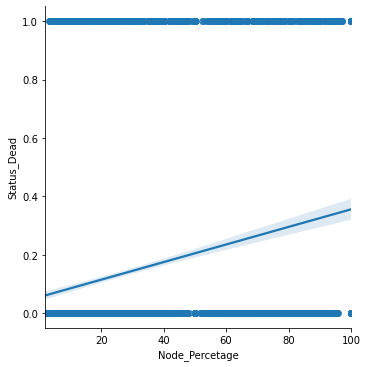

In [68]:
plt.figure(figsize=(14, 7))
sns.lmplot(x="Node_Percetage", y="Status_Dead", data=df_percentage)


We thought that there might be a higher correlation between Node_Percetage and Status_Dead, however as we can see by looking at this graph and the next the correlation is weaker therefore we will ignore this attribute.

Next we will graph our data with the highest correlations so we can perhaps understand what affected the correlations, the first one we will deal with is 'Reginol Node Positive':

<Figure size 1008x504 with 0 Axes>

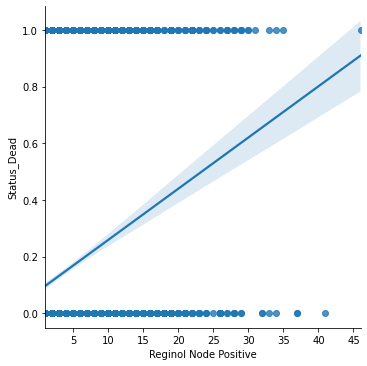

In [69]:
plt.figure(figsize=(14, 7))
sns.lmplot(x="Reginol Node Positive", y="Status_Dead", data=df_status)


We noticed above that there's also a strong correlation with 6th Stage, let's add it to our graph as well, but before we do that we should undertand the change of probibility to stay alive in each stage, in order to do that we will use pie charts as follows:

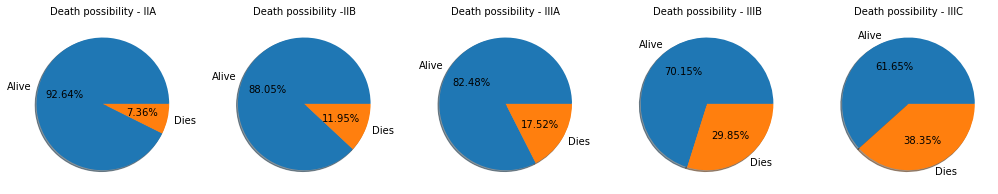

-----------------------------------------------------------------------------------------------------------------------


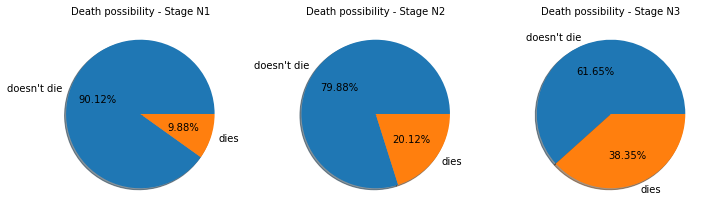

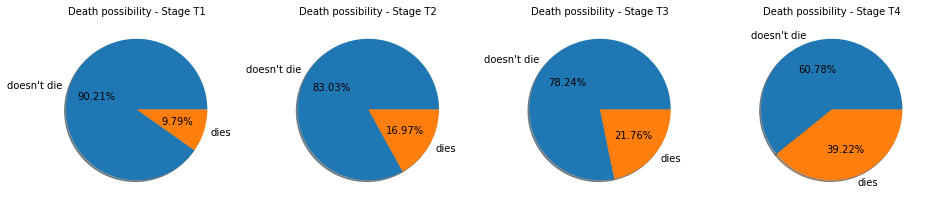

In [70]:
fig, ax = plt.subplots(1,5, figsize = (14,14))
((ax1), (ax2) , (ax3),(ax4) , (ax5) ) = ax

labels = ["Alive", "Dies"]
values = df_result[df_result['6th Stage_IIA']==1]['Status_Dead'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("Death possibility - IIA", fontdict={'fontsize': 10})

labels = ["Alive", "Dies"]
values = df_result[df_result['6th Stage_IIB']==1]['Status_Dead'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("Death possibility -IIB", fontdict={'fontsize': 10})

labels = ["Alive", "Dies"]
values = df_result[df_result['6th Stage_IIIA']==1]['Status_Dead'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("Death possibility - IIIA", fontdict={'fontsize': 10})

labels = ["Alive", "Dies"]
values = df_result[df_result['6th Stage_IIIB']==1]['Status_Dead'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("Death possibility - IIIB", fontdict={'fontsize': 10})

labels = ["Alive", "Dies"]
values = df_result[df_result['6th Stage_IIIC']==1]['Status_Dead'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax5.set_title("Death possibility - IIIC", fontdict={'fontsize': 10})

plt.tight_layout()
plt.show()

print("-----------------------------------------------------------------------------------------------------------------------")


fig, ax = plt.subplots(1,3, figsize = (10,10))
((ax1, ax2 ,ax3)) = ax

labels = ["doesn't die", "dies"]
values = df_result[df_result['N Stage_N1']==1]['Status_Dead'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("Death possibility - Stage N1", fontdict={'fontsize': 10})

labels = ["doesn't die", "dies"]
values = df_result[df_result['N Stage_N2']==1]['Status_Dead'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("Death possibility - Stage N2", fontdict={'fontsize': 10})

labels = ["doesn't die", "dies"]
values = df_result[df_result['N Stage_N3']==1]['Status_Dead'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("Death possibility - Stage N3", fontdict={'fontsize': 10})


plt.tight_layout()
plt.show()



fig, ax = plt.subplots(1,4, figsize = (13,13))
((ax1, ax2 ,ax3, ax4)) = ax

labels = ["doesn't die", "dies"]
values = df_result[df_result['T stage_T1']==1]['Status_Dead'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("Death possibility - Stage T1", fontdict={'fontsize': 10})

labels = ["doesn't die", "dies"]
values = df_result[df_result['T stage_T2']==1]['Status_Dead'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("Death possibility - Stage T2", fontdict={'fontsize': 10})

labels = ["doesn't die", "dies"]
values = df_result[df_result['T stage_T3']==1]['Status_Dead'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("Death possibility - Stage T3", fontdict={'fontsize': 10})

labels = ["doesn't die", "dies"]
values = df_result[df_result['T stage_T4']==1]['Status_Dead'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("Death possibility - Stage T4", fontdict={'fontsize': 10})


plt.tight_layout()
plt.show()

**Notice how major the change is in each stage**

Since 6th stage is a combination of N stage and T stage have ploted those stages as well underneath the A stage,
another important observation to notice is how big the jump is between stages and how fast the survival perfectage decreases in each stage.

After having understood the stages we can move next and understand our data.

<Figure size 1008x504 with 0 Axes>

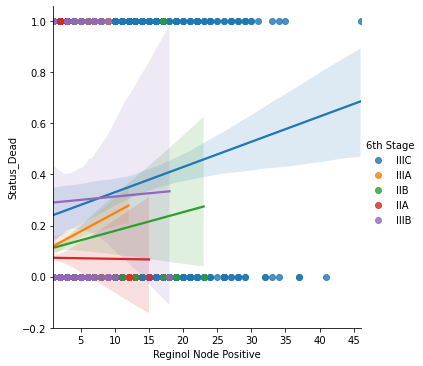

In [71]:
plt.figure(figsize=(14, 7))
sns.lmplot(x="Reginol Node Positive", y="Status_Dead", hue = '6th Stage',  data=df_status)

We can see that the lines are almost sorted according to the stages meaning the worse the cancer gets the more chances a woman has of dying. Notice that IIIC affects the correlation more than any other stage.

<Figure size 1008x504 with 0 Axes>

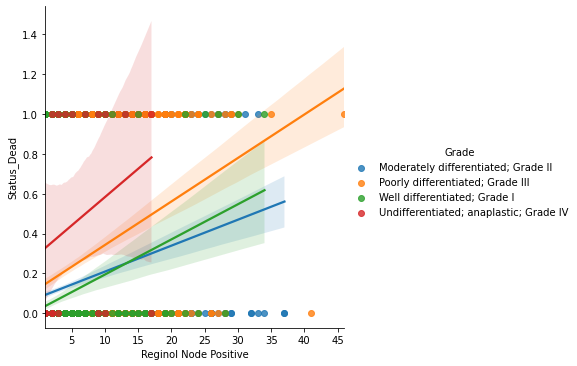

In [72]:
plt.figure(figsize=(14, 7))
sns.lmplot(x="Reginol Node Positive", y="Status_Dead", hue = 'Grade',  data=df_status)

Notice that in the correlation list above (with Status_Dead) the order of the grades was Grade_III >  Grade_IV >  Grade_II  > Grade_I, in this graph the correlations are at different order Grade IV > Grade_III > Grade_I > Grade_II, all the correlations in the graph are strong so we can tell that this has a large affect on the final correlation between the two.

<Figure size 1008x504 with 0 Axes>

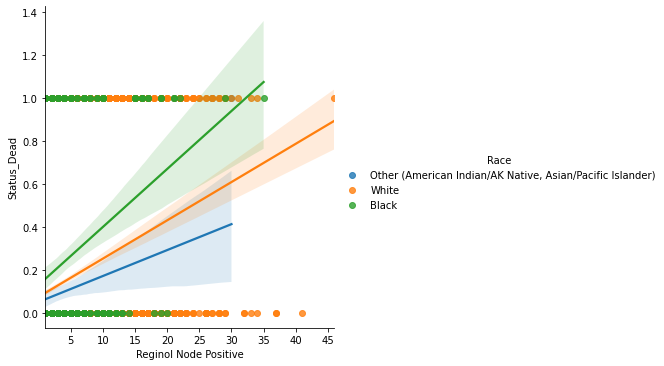

In [73]:
plt.figure(figsize=(14, 7))
sns.lmplot(x="Reginol Node Positive", y="Status_Dead", hue = 'Race',  data=df_status)

Race is a parameter that a woman cannot control opposed to tumor size (cause by how often she is getting checked) however it is important for women to acknowledge that their race does (not majorly) affect their chances of survival therefore it is imortant for different races to know that their need to be check more often.

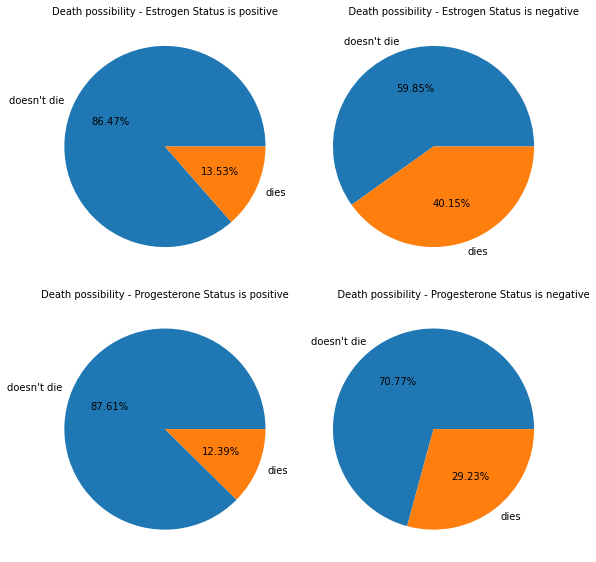

In [74]:
fig, ax = plt.subplots(2,2, figsize = (8,8))
((ax1, ax2) , (ax3, ax4)) = ax

labels = ["doesn't die", "dies"]
values = df_result[df_result['Estrogen Status_Positive']==1]['Status_Dead'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%")
ax1.set_title("Death possibility - Estrogen Status is positive", fontdict={'fontsize': 10})

labels = ["doesn't die", "dies"]
values = df_result[df_result['Estrogen Status_Negative']==1]['Status_Dead'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%")
ax2.set_title("                   Death possibility - Estrogen Status is negative", fontdict={'fontsize': 10})

labels = ["doesn't die", "dies"]
values = df_result[df_result['Progesterone Status_Positive']==1]['Status_Dead'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%")
ax3.set_title("Death possibility - Progesterone Status is positive", fontdict={'fontsize': 10})

labels = ["doesn't die", "dies"]
values = df_result[df_result['Progesterone Status_Negative']==1]['Status_Dead'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%")
ax4.set_title("                   Death possibility - Progesterone Status is negative", fontdict={'fontsize': 10})

plt.tight_layout()
plt.show()

We can deduce that the chances of recovery if the patient is estrogen positive is higher by 26.62%
the chances of recovery if the patient is estrogen positive is higher by 16.84%.

<Figure size 1008x504 with 0 Axes>

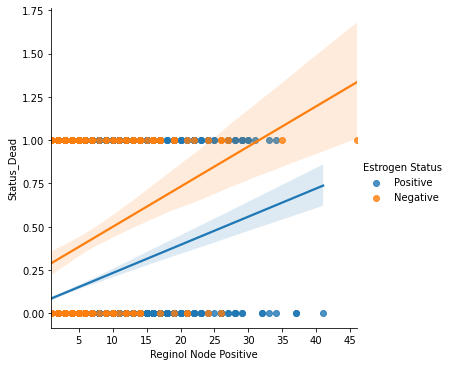

<Figure size 1008x504 with 0 Axes>

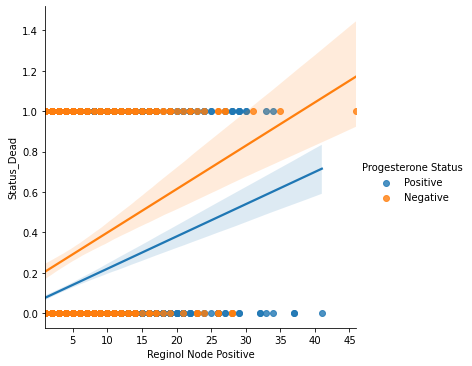

In [75]:
plt.figure(figsize=(14, 7))
sns.lmplot(x="Reginol Node Positive", y="Status_Dead",hue = 'Estrogen Status',  data=df_status)

plt.figure(figsize=(14, 7))
sns.lmplot(x="Reginol Node Positive", y="Status_Dead",hue = 'Progesterone Status',  data=df_status)

From the two graphs above we learn that the chances of a woman to survive is higher if she is positive to estrogen and progestrone, as we expected from the pie charts above.

Next we will do the same thing with **Tumor Size** as it also has a high correlation with Status_Dead.

<Figure size 1008x504 with 0 Axes>

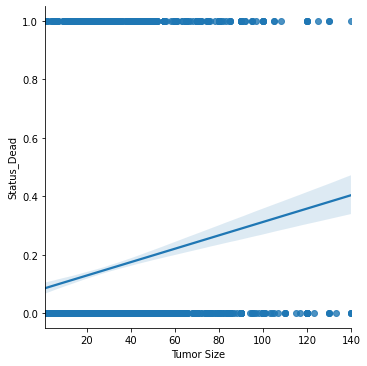

<Figure size 1008x504 with 0 Axes>

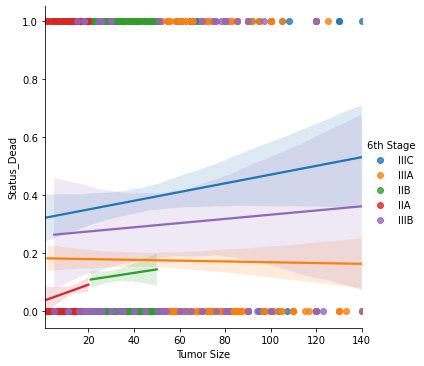

In [76]:
plt.figure(figsize=(14, 7))
sns.lmplot(x="Tumor Size", y="Status_Dead",  data=df_status)

plt.figure(figsize=(14, 7))
sns.lmplot(x="Tumor Size", y="Status_Dead", hue = '6th Stage',  data=df_status)

Note that in the Distant there would only be Stage 3 patients as that is how to classify the third stage. 
Adding to that, the main cause of this correlation is IIIC which is the "highest" stage and we can see that most people die at that stage, the question is whether there is a way to prevent getting to that stage at first place?

<Figure size 1008x504 with 0 Axes>

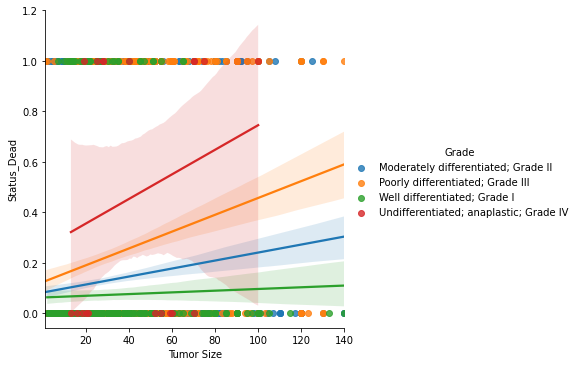

In [77]:
plt.figure(figsize=(14, 7))
sns.lmplot(x="Tumor Size", y="Status_Dead", hue = 'Grade',  data=df_status)

Notice again how strong the correlation is between the Status and the Tumor Size in relation to Grade IV and Grade III, unfortenatly this again a parameter that is important to keep in mind when creating our model.

<Figure size 1008x504 with 0 Axes>

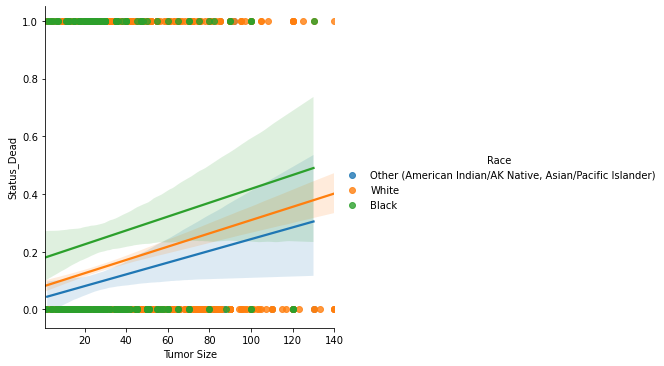

In [78]:
plt.figure(figsize=(14, 7))
sns.lmplot(x="Tumor Size", y="Status_Dead", hue = 'Race',  data=df_status)

Unlike the graph when the X axis is the Regional Node Positive, here this is barely a difference in thr correlations between the races, however the stating point of each race on the Y axis is different therefore once again it is important to keep that in mind. 


We saw that 'Estrogen Status_Negative' and 'Progesterone Status_Negative' also have a pretty high correlation with Status_Dead therefore we will add that information to our graph as well so we can possibly visualize better our data and correlations:

<Figure size 1008x504 with 0 Axes>

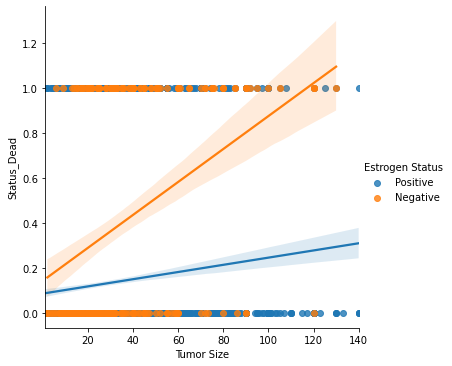

<Figure size 1008x504 with 0 Axes>

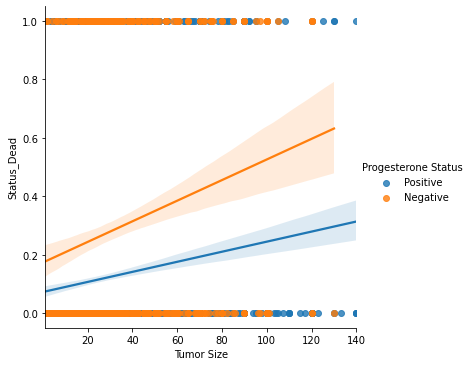

In [79]:
plt.figure(figsize=(14, 7))
sns.lmplot(x="Tumor Size", y="Status_Dead",hue = 'Estrogen Status',  data=df_status)

plt.figure(figsize=(14, 7))
sns.lmplot(x="Tumor Size", y="Status_Dead",hue = 'Progesterone Status',  data=df_status)

Surprisingly when it comes to Tumos Size against Status_Dead, being **negative** to both hormones is actually bad and especially to estrogen which almost has a perfect correlation with death, which is as we saw in our main correlation with death.

## Choosing a way to evaluate our model

In order to evaluate our model we have to choose an error model. When classifing our data there are four options:
   
   **True Positive** - if the outcome of the test is positive and it is correct.
   **True Negative** - if the outcome of the test is negative and it is correct.
   **False Positive** - if the outcome of the test is positive and it is not correct.
   **False Negative** - if the outcome of the test is negative and it is not correct.
   
We can calculate the **accuracy** of our model by calculating (the number of currect predictions) / (the number of total predictions) = (TP + TN)/(TP + TN + FP + FN).
    Our model has to be as accurate as possible because it could essentially impact women's decision on whether they would like to get a treatment.

We could also calculate the **recall** of the model (the ability of a model to find all relevant data in a dataset) by calculating (TP)/(TP + FN)

Another thing we would want to calculate is **precision** of the model (the ability of a model to identify the relevent data) and is calculated by (TP)/ (TP + FP).

Last but not least we have the **F1 score** which is a combination of recall and precision by using the equation: 2 * ((precision * recall) / (precision+recall)).


We will use accuracy as a way of determening how good our model is as we would like to tell women their chances of recovery (surviving), we will have to be very accurate with our model since it could essentially affect a woman's decision on whether she'd like to get treated and if we are wrong we could potentially cause unnecesary loss of human life.



## Train and test Sets

In [80]:
X = df_result.drop(columns=['Status_Dead' , 'Status_Alive'])
Y = df_result['Status_Dead']
split = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.25)
for train_index, test_index in split.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
X = {'train': x_train, 'test': x_test}
y = {'train': y_train, 'test': y_test}

print(y_train.describe(), y_test.describe())


count    3018.000000
mean        0.153082
std         0.360126
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Status_Dead, dtype: float64 count    1006.000000
mean        0.153082
std         0.360245
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Status_Dead, dtype: float64


In [81]:
x_train

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Divorced,Marital Status_Married (including common law),...,Grade_Moderately differentiated; Grade II,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
1945,61,40,11,8,72,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
6,64,22,1,1,3,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
3959,62,10,10,1,106,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
1961,54,21,23,1,72,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
733,55,31,22,1,52,0,0,1,0,1,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,49,30,15,2,82,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,1
2748,63,23,19,1,85,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,1
2775,49,70,15,2,86,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
2191,63,25,14,2,76,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,1


We will first normalise our data:

In [82]:
df = x_train.drop(['Marital Status_Divorced', 'Marital Status_Married (including common law)', 'Marital Status_Separated', 'Marital Status_Single (never married)', 'Marital Status_Widowed'], axis=1)
df_xtrain_norm = (df-df.min())/(df.max()-df.min())
 
print("Normalized Dataset Using Pandas")
df_xtrain_norm

Normalized Dataset Using Pandas


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,T stage_T1,T stage_T2,...,Grade_Moderately differentiated; Grade II,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
1945,0.794872,0.280576,0.166667,0.155556,0.669811,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
6,0.871795,0.151079,0.000000,0.000000,0.018868,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3959,0.820513,0.064748,0.150000,0.000000,0.990566,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1961,0.615385,0.143885,0.366667,0.000000,0.669811,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
733,0.641026,0.215827,0.350000,0.000000,0.481132,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,0.487179,0.208633,0.233333,0.022222,0.764151,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2748,0.846154,0.158273,0.300000,0.000000,0.792453,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2775,0.487179,0.496403,0.233333,0.022222,0.801887,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2191,0.846154,0.172662,0.216667,0.022222,0.707547,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [83]:
df = x_test.drop(['Marital Status_Divorced', 'Marital Status_Married (including common law)', 'Marital Status_Separated', 'Marital Status_Single (never married)', 'Marital Status_Widowed'], axis=1)
df_xtest_norm = (df-df.min())/(df.max()-df.min())
 
print("Normalized Dataset")
df_xtest_norm

Normalized Dataset


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,T stage_T1,T stage_T2,...,Grade_Moderately differentiated; Grade II,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
1338,0.974359,0.208633,0.186441,0.250000,0.571429,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2766,0.410256,0.093525,0.271186,0.000000,0.790476,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
556,0.384615,0.165468,0.271186,0.361111,0.447619,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2063,0.102564,0.244604,0.118644,0.055556,0.685714,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2481,0.230769,0.258993,0.288136,0.388889,0.752381,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,0.769231,0.136691,0.220339,0.083333,0.847619,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1865,0.871795,0.165468,0.135593,0.055556,0.647619,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2357,0.948718,0.280576,0.271186,0.055556,0.733333,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
166,0.615385,0.215827,0.254237,0.222222,0.200000,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [84]:
df_xtrain_norm.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,T stage_T1,T stage_T2,...,Grade_Moderately differentiated; Grade II,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
count,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,...,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000
mean,0.612598,0.212585,0.224227,0.070945,0.663156,0.069583,0.079523,0.850895,0.403579,0.438701,...,0.584162,0.277667,0.005302,0.132869,0.021206,0.978794,0.066932,0.933068,0.166667,0.833333
std,0.228952,0.154103,0.134697,0.114266,0.215057,0.254484,0.270598,0.356251,0.490696,0.496310,...,0.492948,0.447923,0.072630,0.339490,0.144095,0.144095,0.249945,0.249945,0.372740,0.372740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.435897,0.107914,0.133333,0.000000,0.518868,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,0.615385,0.172662,0.216667,0.022222,0.679245,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.794872,0.266187,0.300000,0.088889,0.830189,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
df_xtest_norm.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,T stage_T1,T stage_T2,...,Grade_Moderately differentiated; Grade II,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,...,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,0.620890,0.210407,0.221485,0.084852,0.660078,0.080517,0.079523,0.839960,0.382704,0.459245,...,0.584493,0.271372,0.002982,0.141153,0.027833,0.972167,0.066600,0.933400,0.193837,0.806163
std,0.232425,0.145321,0.138138,0.139201,0.221953,0.272227,0.270688,0.366825,0.486289,0.498584,...,0.493054,0.444889,0.054554,0.348353,0.164576,0.164576,0.249453,0.249453,0.395499,0.395499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461538,0.107914,0.135593,0.000000,0.523810,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,0.615385,0.172662,0.203390,0.027778,0.676190,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.820513,0.280576,0.288136,0.111111,0.838095,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After having splitting our data into 75% train and 25% test data, we have normalized our dataset, we can see that we succeeded because in the describe tables the count is as it should be and the min is 0 and max is 1.

## Scaling

In [86]:
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

In [87]:
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

# numerical features
num_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',]
# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x_train_stand[[i]])
    
    # transform the training data column
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    
    # transform the testing data column
    x_test_stand[i] = scale.transform(x_test_stand[[i]])

In [88]:
x_train_stand

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Divorced,Marital Status_Married (including common law),...,Grade_Moderately differentiated; Grade II,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
1945,0.796256,0.441273,-0.427402,0.740595,0.030951,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
6,1.132292,-0.399191,-1.664951,-0.620976,-2.996394,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
3959,0.908268,-0.959499,-0.551156,-0.620976,1.522686,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
1961,0.012174,-0.445883,1.057658,-0.620976,0.030951,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
733,0.124185,0.021041,0.933903,-0.620976,-0.846541,0,0,1,0,1,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,-0.547885,-0.025651,0.067618,-0.426466,0.469696,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,1
2748,1.020280,-0.352498,0.562638,-0.620976,0.601320,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,1
2775,-0.547885,1.842045,0.067618,-0.426466,0.645194,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
2191,1.020280,-0.259113,-0.056137,-0.426466,0.206449,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,1


In [89]:
x_train_stand.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Divorced,Marital Status_Married (including common law),...,Grade_Moderately differentiated; Grade II,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
count,3.018000e+03,3.018000e+03,3.018000e+03,3.018000e+03,3.018000e+03,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,...,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000
mean,1.540168e-16,-7.629564e-17,-1.284592e-16,5.030215e-16,-7.210196e-18,0.069583,0.079523,0.850895,0.122598,0.658714,...,0.584162,0.277667,0.005302,0.132869,0.021206,0.978794,0.066932,0.933068,0.166667,0.833333
std,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,0.254484,0.270598,0.356251,0.328029,0.474220,...,0.492948,0.447923,0.072630,0.339490,0.144095,0.144095,0.249945,0.249945,0.372740,0.372740
min,-2.676110e+00,-1.379731e+00,-1.664951e+00,-6.209757e-01,-3.084143e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.719091e-01,-6.793450e-01,-6.749114e-01,-6.209757e-01,-6.710423e-01,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,1.217358e-02,-2.591134e-01,-5.613669e-02,-4.264656e-01,7.482516e-02,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,7.962563e-01,3.478878e-01,5.626381e-01,1.570646e-01,7.768181e-01,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.692351e+00,5.110513e+00,5.760346e+00,8.131978e+00,1.566560e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
x_test_stand

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Divorced,Marital Status_Married (including common law),...,Grade_Moderately differentiated; Grade II,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
1338,1.580339,-0.025651,-0.303647,1.129615,-0.407795,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
2766,-0.883921,-0.772730,0.315128,-0.620976,0.601320,0,0,1,0,1,...,1,0,0,0,0,1,0,1,1,0
556,-0.995933,-0.305806,0.315128,1.907655,-0.978164,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,1
2063,-2.228063,0.207811,-0.798666,-0.231956,0.118700,0,0,1,0,1,...,1,0,0,0,0,1,0,1,1,0
2481,-1.668004,0.301195,0.438883,2.102166,0.425822,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,0.684244,-0.492575,-0.056137,-0.037445,0.864567,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,1
1865,1.132292,-0.305806,-0.674911,-0.231956,-0.056799,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,1
2357,1.468327,0.441273,0.315128,-0.231956,0.338073,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
166,0.012174,0.021041,0.191373,0.935105,-2.118903,0,0,1,0,1,...,0,1,0,0,0,1,1,0,1,0


In [91]:
x_test_stand.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Divorced,Marital Status_Married (including common law),...,Grade_Moderately differentiated; Grade II,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,...,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,0.036224,-0.014141,-0.047772,-0.026811,0.000596,0.080517,0.079523,0.839960,0.115308,0.651093,...,0.584493,0.271372,0.002982,0.141153,0.027833,0.972167,0.066600,0.933400,0.193837,0.806163
std,1.015341,0.943171,1.008624,0.974735,1.022498,0.272227,0.270688,0.366825,0.319552,0.476861,...,0.493054,0.444889,0.054554,0.348353,0.164576,0.164576,0.249453,0.249453,0.395499,0.395499
min,-2.676110,-1.379731,-1.664951,-0.620976,-3.040268,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.659897,-0.679345,-0.674911,-0.620976,-0.627168,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,0.012174,-0.259113,-0.179892,-0.426466,0.074825,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.908268,0.441273,0.438883,0.157065,0.820693,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.692351,5.110513,5.636591,6.381388,1.566560,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This is our scaling tables, we know that we managed to do the scaling because our mean is very close to 0 and our STD is almost 1.

## Creating a knn model

According to Towards Data Science the optimal value of K is the square root of the number of samples, as we're dealing only with the train set our K value will be 55.

Text(0, 0.5, 'Testing data accuracy')

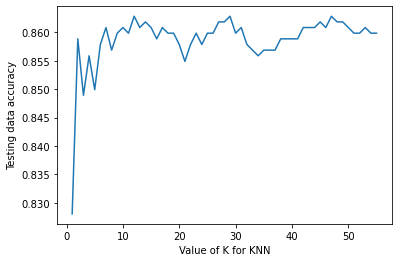

In [92]:
k_range = list(range(1, 56))
array = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_xtrain_norm, y_train)
    y_pred = knn.predict(df_xtest_norm)
    array.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, array)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing data accuracy')

In [93]:
max_score = max(array)
top = array.index(max(array))+1

print( str(top))

12


In [94]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(df_xtrain_norm, y_train)

KNeighborsClassifier(n_neighbors=8)

In [95]:
y_pred = classifier.predict(df_xtest_norm)

In [96]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[831  21]
 [123  31]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       852
           1       0.60      0.20      0.30       154

    accuracy                           0.86      1006
   macro avg       0.73      0.59      0.61      1006
weighted avg       0.83      0.86      0.83      1006



In [97]:
df = x_train.drop(['Marital Status_Divorced', 'Marital Status_Married (including common law)', 'Marital Status_Separated', 'Marital Status_Single (never married)', 'Marital Status_Widowed', 'Race_Other (American Indian/AK Native, Asian/Pacific Islander)', 'Race_White','T stage_T1', 'T stage_T2', 'T stage_T3','N Stage_N1', 'N Stage_N2', '6th Stage_IIA', '6th Stage_IIB', 'Estrogen Status_Positive', 'Progesterone Status_Positive' ], axis=1)
df_xtrain_norm = (df-df.min())/(df.max()-df.min())
 
print("Normalised Dataset Using Pandas")
df_xtrain_norm

Normalised Dataset Using Pandas


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,T stage_T4,N Stage_N3,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Moderately differentiated; Grade II,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Progesterone Status_Negative
1945,0.794872,0.280576,0.166667,0.155556,0.669811,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.871795,0.151079,0.000000,0.000000,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3959,0.820513,0.064748,0.150000,0.000000,0.990566,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1961,0.615385,0.143885,0.366667,0.000000,0.669811,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
733,0.641026,0.215827,0.350000,0.000000,0.481132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,0.487179,0.208633,0.233333,0.022222,0.764151,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2748,0.846154,0.158273,0.300000,0.000000,0.792453,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2775,0.487179,0.496403,0.233333,0.022222,0.801887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2191,0.846154,0.172662,0.216667,0.022222,0.707547,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [98]:
print(df.columns.tolist())

['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Race_Black', 'T stage_T4', 'N Stage_N3', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC', 'Grade_Moderately differentiated; Grade II', 'Grade_Poorly differentiated; Grade III', 'Grade_Undifferentiated; anaplastic; Grade IV', 'Grade_Well differentiated; Grade I', 'A Stage_Distant', 'A Stage_Regional', 'Estrogen Status_Negative', 'Progesterone Status_Negative']


In [99]:
df = x_test.drop(['Marital Status_Divorced', 'Marital Status_Married (including common law)', 'Marital Status_Separated', 'Marital Status_Single (never married)', 'Marital Status_Widowed', 'Race_Other (American Indian/AK Native, Asian/Pacific Islander)', 'Race_White','T stage_T1', 'T stage_T2', 'T stage_T3','N Stage_N1', 'N Stage_N2', '6th Stage_IIA', '6th Stage_IIB', 'Estrogen Status_Positive', 'Progesterone Status_Positive' ], axis=1)

df_xtest_norm = (df-df.min())/(df.max()-df.min())
 
print("Normalised Dataset")
df_xtest_norm

Normalised Dataset


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,T stage_T4,N Stage_N3,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Moderately differentiated; Grade II,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Progesterone Status_Negative
1338,0.974359,0.208633,0.186441,0.250000,0.571429,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2766,0.410256,0.093525,0.271186,0.000000,0.790476,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
556,0.384615,0.165468,0.271186,0.361111,0.447619,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2063,0.102564,0.244604,0.118644,0.055556,0.685714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2481,0.230769,0.258993,0.288136,0.388889,0.752381,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,0.769231,0.136691,0.220339,0.083333,0.847619,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1865,0.871795,0.165468,0.135593,0.055556,0.647619,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2357,0.948718,0.280576,0.271186,0.055556,0.733333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
166,0.615385,0.215827,0.254237,0.222222,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


Text(0, 0.5, 'Testing data accuracy')

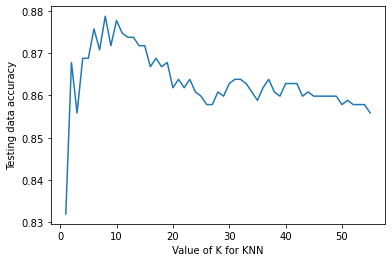

In [100]:
k_range = list(range(1, 56))
array = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_xtrain_norm, y_train)
    y_pred = knn.predict(df_xtest_norm)
    array.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, array)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing data accuracy')

In [101]:
max_score = max(array)
top = array.index(max(array))+1

print( str(top))

8


In [102]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(df_xtrain_norm, y_train)

y_pred = classifier.predict(df_xtest_norm)



In [103]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[838  14]
 [111  43]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       852
           1       0.75      0.28      0.41       154

    accuracy                           0.88      1006
   macro avg       0.82      0.63      0.67      1006
weighted avg       0.86      0.88      0.85      1006



In [117]:
LogReg_predict = cross_val_predict(LogReg(), df_xtrain_norm, y_train, cv = 4)

In [123]:
LogReg = LogisticRegression(max_iter = 4023)

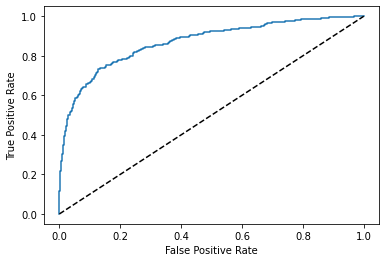

In [124]:
LogReg.fit(df_xtrain_norm,y_train)
y_AUC = LogReg.predict_proba(df_xtrain_norm)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_AUC)
plt.plot(fpr,tpr,[0, 1], [0, 1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [125]:
roc_auc_score(y_train,LogReg_predict)

0.6920131902526268

Text(0, 0.5, 'Testing data accuracy')

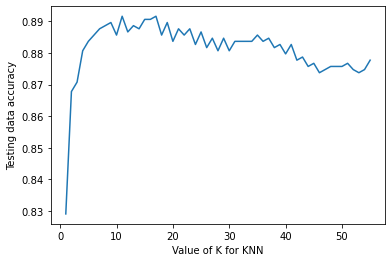

In [126]:
k_range = list(range(1, 56))
array = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_stand, y_train)
    y_pred = knn.predict(x_test_stand)
    array.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, array)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing data accuracy')

In [127]:
max_score = max(array)
top = array.index(max(array))+1

print( str(top))

11


In [128]:
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(df_xtrain_norm, y_train)

y_pred = classifier.predict(df_xtest_norm)

In [129]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[840  12]
 [114  40]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       852
           1       0.77      0.26      0.39       154

    accuracy                           0.87      1006
   macro avg       0.82      0.62      0.66      1006
weighted avg       0.86      0.87      0.85      1006



From our results we deduce that we should be using normalisation as when we use scaling our max accuracy is lower and it misclassifies 5 patients which is significant.

## Random forest model

In [130]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(df_xtrain_norm,y_train)

y_pred=clf.predict(df_xtest_norm)

In [131]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9055666003976143


In [132]:
df = x_train.drop([ 'Race_Other (American Indian/AK Native, Asian/Pacific Islander)', 'Race_White', 'T stage_T1', 'T stage_T2', 'T stage_T3', 'T stage_T4', 'N Stage_N1', 'N Stage_N2', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB',  'Grade_Moderately differentiated; Grade II', 'Grade_Poorly differentiated; Grade III', 'Grade_Undifferentiated; anaplastic; Grade IV', 'Grade_Well differentiated; Grade I', 'A Stage_Distant', 'A Stage_Regional', 'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive'], axis=1)
df_xtrain_norm = (df-df.min())/(df.max()-df.min())

In [133]:
df = x_test.drop([ 'Race_Other (American Indian/AK Native, Asian/Pacific Islander)', 'Race_White', 'T stage_T1', 'T stage_T2', 'T stage_T3', 'T stage_T4', 'N Stage_N1', 'N Stage_N2', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB',  'Grade_Moderately differentiated; Grade II', 'Grade_Poorly differentiated; Grade III', 'Grade_Undifferentiated; anaplastic; Grade IV', 'Grade_Well differentiated; Grade I', 'A Stage_Distant', 'A Stage_Regional', 'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive'], axis=1)

df_xtest_norm = (df-df.min())/(df.max()-df.min())

In [134]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(df_xtrain_norm,y_train)

y_pred=clf.predict(df_xtest_norm)

In [135]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9035785288270378


We tried to get rig of some attributes and we saw that our accuracy decreases not by a lot buy it chances by 0.5% which in our dataset would mean that it'll misclassify 20 patients. We will keep out dataset as is since it gives us the best result we can get.

In [136]:
LogReg_predict = cross_val_predict(LogReg, x_train, y_train, cv = 10)

In [137]:
LogReg = LogisticRegression(max_iter = 4023)
LogReg.fit(x_train,y_train)

LogisticRegression(max_iter=4023)

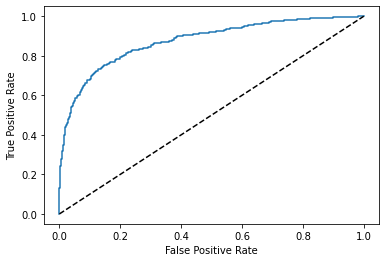

In [138]:
y_AUC = LogReg.predict_proba(x_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_AUC)
plt.plot(fpr,tpr,[0, 1], [0, 1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [139]:
roc_auc_score(y_train,LogReg_predict)

0.7115064122106375

ROC curve can help us choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context.

In this model we got a higher accuracy which means this model suits our dataset better, when a patient comes to ask about their survival chances we should use both models and find the better answer (which in our oppinion the zero model should be chances of survival so worst case the patient did get her treatments and didn't survive, we chose that as our zero model (with an accuracy of 84.7%) as choosing the other option would mean we cause many women who could survive lose their lives).

## Adaboost model

In [140]:
clf_ada = AdaBoostClassifier(random_state=96, learning_rate=0.80)
clf_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.8, random_state=96)

In [141]:
clf_ada.score(x_train,y_train)

0.9055666003976143

In [142]:
clf_ada.score(x_test,y_test)

0.9055666003976143

In [143]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9035785288270378


We notice that although the accuracy is fairly high, we didn't  manage to increase it and make it better than the random forest.

## Random forest


In [169]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [170]:
y_pred_rf = rnd_clf.predict(x_test)

In [171]:
rnd_clf.score(x_test,y_test)

0.882703777335984